In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

import networkx as nx

In [2]:
data = pd.read_parquet('D:/소셜네트워크과학/Drug_Coprescription_Network_Analysis/data/antidepressant_prescription_all_years.parquet')
data

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
0,2017,31,47455974,2,2,10,26,2017-03-23,229601ATB,1.0,2,35,152.0,10640,2018-11-26,N06AX14
1,2017,56,36005918,2,2,11,30,2017-11-13,229601ATB,1.0,3,14,158.0,6636,2018-11-26,N06AX14
2,2017,62,7819529,2,1,12,41,2017-07-11,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
3,2017,62,35429246,2,1,12,41,2017-08-08,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
4,2017,62,37765102,5,1,12,41,2017-06-09,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183763,2021,362319,8537598,1,1,8,41,2021-05-05,161502ACH,3.0,1,30,483.0,43470,2022-08-11,N06AB03
1183764,2021,975259,8678062,2,2,6,11,2021-12-25,613101ATB,0.5,1,14,591.0,4137,2022-08-11,N06AX22
1183765,2021,302702,10860741,2,2,13,47,2021-08-08,242901ATB,0.5,2,63,47.0,2961,2022-08-11,N06AX05
1183766,2021,766500,11702317,3,1,17,44,2021-05-05,227001ATB,0.5,1,21,499.0,5240,2022-08-11,N06AB06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183768 entries, 0 to 1183767
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   기준년도         1183768 non-null  int64         
 1   가입자일련번호      1183768 non-null  int64         
 2   처방내역일련번호     1183768 non-null  int64         
 3   일련번호         1183768 non-null  int64         
 4   성별코드         1183768 non-null  int64         
 5   연령대코드(5세단위)  1183768 non-null  int64         
 6   시도코드         1183768 non-null  int64         
 7   요양개시일자       1183768 non-null  datetime64[ns]
 8   약품일반성분명코드    1183768 non-null  object        
 9   1회 투약량       1183768 non-null  float64       
 10  1일투약량        1183768 non-null  int64         
 11  총투여일수        1183768 non-null  int64         
 12  단가           1183768 non-null  float64       
 13  금액           1183768 non-null  int64         
 14  데이터 공개일자     1183768 non-null  datetime64[ns]
 15  ATC코드        11

In [4]:
data[data['기준년도']== 2021]

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
907637,2021,856296,1707917,1,2,13,41,2021-09-28,495501ACE,1.0,1,3,363.0,1089,2022-08-11,N06AX21
907638,2021,454748,3323987,1,2,13,41,2021-01-25,242901ACH,1.0,1,3,40.0,120,2022-08-11,N06AX05
907639,2021,251575,764386,1,2,13,41,2021-09-13,196204ATB,1.0,1,30,448.0,13440,2022-08-11,N06AX11
907640,2021,235148,2654234,1,2,13,41,2021-10-13,107501ATB,1.0,1,30,23.0,690,2022-08-11,N06AA09
907641,2021,524895,3529380,1,2,13,41,2021-10-01,209305ATR,1.0,1,30,729.0,21870,2022-08-11,N06AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183763,2021,362319,8537598,1,1,8,41,2021-05-05,161502ACH,3.0,1,30,483.0,43470,2022-08-11,N06AB03
1183764,2021,975259,8678062,2,2,6,11,2021-12-25,613101ATB,0.5,1,14,591.0,4137,2022-08-11,N06AX22
1183765,2021,302702,10860741,2,2,13,47,2021-08-08,242901ATB,0.5,2,63,47.0,2961,2022-08-11,N06AX05
1183766,2021,766500,11702317,3,1,17,44,2021-05-05,227001ATB,0.5,1,21,499.0,5240,2022-08-11,N06AB06


In [5]:
years = [2017, 2018, 2019, 2020, 2021]
for year in years:
        print(data[data['기준년도']== year].shape[0])

205686
212869
231136
257946
276131


# 연도별 네트워크

### 연도별 density 확인하기(self-loop 존재)

In [7]:
data.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자,ATC코드
0,2017,31,47455974,2,2,10,26,2017-03-23,229601ATB,1.0,2,35,152.0,10640,2018-11-26,N06AX14
1,2017,56,36005918,2,2,11,30,2017-11-13,229601ATB,1.0,3,14,158.0,6636,2018-11-26,N06AX14
2,2017,62,7819529,2,1,12,41,2017-07-11,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
3,2017,62,35429246,2,1,12,41,2017-08-08,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05
4,2017,62,37765102,5,1,12,41,2017-06-09,242901ATB,2.0,1,28,40.0,2240,2018-11-26,N06AX05


### self loop 없는 네트워크 통계(연도별 네트워크 생성 후 degree centrality 상위 10개 출력)

In [8]:
import networkx as nx
from collections import OrderedDict
from collections import defaultdict

# 연도별로 네트워크 생성 및 density 계산 (self-loop 제외)
year_density_no_self_loop = {}
year_edge_count = {}
year_node_count = {}
year_degree_centrality = {}
year_betweenness_centrality = {}
year_eigenvector_centrality = {}
# 연도별 그래프를 저장할 딕셔너리 추가
year_graphs = {}

for year, df_year in data.groupby(data['요양개시일자'].dt.year):
    # 고유한 ATC 코드 페어 찾기 (self-loop 제외)
    grouped = df_year.groupby('처방내역일련번호')
    edges_weight = defaultdict(int)  # 엣지와 가중치를 저장할 딕셔너리
    nodes = set()
    
    for _, group in grouped:
        atc_codes = list(group['ATC코드'].unique())
        nodes.update(atc_codes)
        for i in range(len(atc_codes)):
            for j in range(i + 1, len(atc_codes)):
                edge = tuple(sorted([atc_codes[i], atc_codes[j]]))
                edges_weight[edge] += 1  # 동시 처방 횟수 증가
    
    # 그래프 생성
    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    # 가중치가 있는 엣지 추가
    for edge, weight in edges_weight.items():
        G.add_edge(*edge, weight=weight)
    
    # 가중치를 고려한 Degree centrality 계산
    degree = dict(G.degree(weight='weight'))
    max_degree = max(degree.values()) if degree else 1
    degree_centrality = {node: deg/max_degree for node, deg in degree.items()}
    sorted_centrality = OrderedDict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))
    year_degree_centrality[year] = sorted_centrality
    
    #가중치를 제외한 Betweenness centrality 계산
    betweenness_centrality = nx.betweenness_centrality(G)
    year_betweenness_centrality[year] = betweenness_centrality
    sorted_centrality = OrderedDict(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))
    year_betweenness_centrality[year] = sorted_centrality
    
    #가중치를 고려한 Eigenvector centrality 계산
    eigenvector_centrality = nx.eigenvector_centrality(G, weight ='weight')
    year_eigenvector_centrality[year] = eigenvector_centrality
    sorted_centrality = OrderedDict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True))
    year_eigenvector_centrality[year] = sorted_centrality
    
    # 노드 수, 엣지 개수 및 Density 계산
    year_node_count[year] = G.number_of_nodes()
    if G.number_of_nodes() > 1:
        year_edge_count[year] = G.number_of_edges()
        year_density_no_self_loop[year] = nx.density(G)
    else:
        year_edge_count[year] = 0
        year_density_no_self_loop[year] = 0.0
        
    # 생성된 그래프를 딕셔너리에 저장
    year_graphs[year] = G
    

print("연도별 네트워크 통계:")
for year in sorted(year_density_no_self_loop.keys()):
    print(f"{year}년:")
    print(f"  - Node 수: {year_node_count[year]}")
    print(f"  - Edge 수: {year_edge_count[year]}")
    print(f"  - Density: {year_density_no_self_loop[year]:.4f}")
    
# Degree Centrality 결과 출력
for year in sorted(year_degree_centrality.keys()):
    print(f"\n{year}년 Degree Centrality (상위 10개):")
    for i, (node, centrality) in enumerate(list(year_degree_centrality[year].items())[:10], 1):
        print(f"  {i}. 노드: {node}, Centrality: {centrality:.4f}")

연도별 네트워크 통계:
2017년:
  - Node 수: 24
  - Edge 수: 189
  - Density: 0.6848
2018년:
  - Node 수: 24
  - Edge 수: 192
  - Density: 0.6957
2019년:
  - Node 수: 25
  - Edge 수: 213
  - Density: 0.7100
2020년:
  - Node 수: 25
  - Edge 수: 208
  - Density: 0.6933
2021년:
  - Node 수: 24
  - Edge 수: 212
  - Density: 0.7681

2017년 Degree Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 1.0000
  2. 노드: N06AB10, Centrality: 0.7882
  3. 노드: N06AA09, Centrality: 0.4488
  4. 노드: N06AX11, Centrality: 0.3848
  5. 노드: N06AX21, Centrality: 0.3127
  6. 노드: N06AX14, Centrality: 0.2929
  7. 노드: N06AB05, Centrality: 0.2510
  8. 노드: N06AA10, Centrality: 0.2173
  9. 노드: N06AB03, Centrality: 0.1996
  10. 노드: N06AA12, Centrality: 0.1698

2018년 Degree Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 1.0000
  2. 노드: N06AB10, Centrality: 0.7414
  3. 노드: N06AA09, Centrality: 0.3907
  4. 노드: N06AX11, Centrality: 0.3597
  5. 노드: N06AX14, Centrality: 0.2853
  6. 노드: N06AX21, Centrality: 0.2269
  7. 노드: N06AB05, Centrality: 0.22

## Basic stat

### 연도별 betweenness centrality 구하기

In [9]:
# 상위 10개 노드 출력
for year in sorted(year_betweenness_centrality.keys()):
    print(f"\n{year}년 Betweenness Centrality (상위 10개):")    
    for i, (node, centrality) in enumerate(list(year_betweenness_centrality[year].items())[:10], 1):
        print(f"  {i}. 노드: {node}, Centrality: {centrality:.4f}")


2017년 Betweenness Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 0.1031
  2. 노드: N06AB08, Centrality: 0.0872
  3. 노드: N06AA09, Centrality: 0.0232
  4. 노드: N06AX21, Centrality: 0.0232
  5. 노드: N06AA10, Centrality: 0.0232
  6. 노드: N06AB05, Centrality: 0.0232
  7. 노드: N06AX14, Centrality: 0.0206
  8. 노드: N06AA12, Centrality: 0.0162
  9. 노드: N06AB10, Centrality: 0.0154
  10. 노드: N06AX11, Centrality: 0.0112

2018년 Betweenness Centrality (상위 10개):
  1. 노드: N06AX14, Centrality: 0.0857
  2. 노드: N06AX05, Centrality: 0.0856
  3. 노드: N06AX21, Centrality: 0.0269
  4. 노드: N06AA10, Centrality: 0.0258
  5. 노드: N06AX11, Centrality: 0.0245
  6. 노드: N06AB10, Centrality: 0.0120
  7. 노드: N06AA12, Centrality: 0.0120
  8. 노드: N06AA09, Centrality: 0.0120
  9. 노드: N06AB08, Centrality: 0.0119
  10. 노드: N06AB03, Centrality: 0.0053

2019년 Betweenness Centrality (상위 10개):
  1. 노드: N06AA04, Centrality: 0.0833
  2. 노드: N06AX14, Centrality: 0.0636
  3. 노드: N06AX05, Centrality: 0.0510
  4. 노드: N06AB10, Centralit

In [10]:
target_node = 'N06AG02'  # moclobemide
target_year = 2017

if target_node in year_betweenness_centrality[target_year]:
    centrality = year_betweenness_centrality[target_year][target_node]
    print(f"{target_year}년 {target_node}(moclobemide)의 Betweenness Centrality: {centrality:.4f}")
else:
    print(f"{target_year}년에 {target_node} 노드가 존재하지 않음")

2017년 N06AG02(moclobemide)의 Betweenness Centrality: 0.0000


### eigenvector centrality 구하기

In [11]:
# 상위 10개 노드 출력
for year in sorted(year_eigenvector_centrality.keys()):     
     print(f"\n{year}년 Eigenvector Centrality (상위 10개):")
     for i, (node, centrality) in enumerate(list(year_eigenvector_centrality[year].items())[:10], 1):
          print(f"  {i}. 노드: {node}, Centrality: {centrality:.4f}")


2017년 Eigenvector Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 0.5897
  2. 노드: N06AB10, Centrality: 0.5483
  3. 노드: N06AX11, Centrality: 0.2912
  4. 노드: N06AA09, Centrality: 0.2589
  5. 노드: N06AX21, Centrality: 0.1947
  6. 노드: N06AB05, Centrality: 0.1839
  7. 노드: N06AX14, Centrality: 0.1830
  8. 노드: N06AB03, Centrality: 0.1408
  9. 노드: N06AA10, Centrality: 0.1397
  10. 노드: N06AB06, Centrality: 0.1225

2018년 Eigenvector Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 0.6004
  2. 노드: N06AB10, Centrality: 0.5461
  3. 노드: N06AX11, Centrality: 0.2713
  4. 노드: N06AA09, Centrality: 0.2558
  5. 노드: N06AB05, Centrality: 0.1769
  6. 노드: N06AX14, Centrality: 0.1705
  7. 노드: N06AB06, Centrality: 0.1649
  8. 노드: N06AB03, Centrality: 0.1586
  9. 노드: N06AX21, Centrality: 0.1443
  10. 노드: N06AX16, Centrality: 0.1353

2019년 Eigenvector Centrality (상위 10개):
  1. 노드: N06AX05, Centrality: 0.6080
  2. 노드: N06AB10, Centrality: 0.5530
  3. 노드: N06AX11, Centrality: 0.2877
  4. 노드: N06AA09, Centralit

In [12]:
import statistics as stat

def basic_stat_info(data, data_desc):
    print(data_desc.center(30, '-'))
    print(f'[Max]: {max(data):.3f}, [Min]:{min(data):.3f}')
    print(f'[Mean]: {stat.mean(data):.3f}')
    print(f'[Median]: {stat.median(data):.3f}')

In [13]:
degree_seq = [G.degree(n) for n in G.nodes]
basic_stat_info(degree_seq, 'Degree')
basic_stat_info(degree_centrality.values(), 'Degree Centrality')
basic_stat_info(betweenness_centrality.values(), 'Betweenness Centrality')
basic_stat_info(eigenvector_centrality.values(), 'eigenvector Centrality')

------------Degree------------
[Max]: 22.000, [Min]:0.000
[Mean]: 17.667
[Median]: 19.500
------Degree Centrality-------
[Max]: 1.000, [Min]:0.000
[Mean]: 0.204
[Median]: 0.148
----Betweenness Centrality----
[Max]: 0.049, [Min]:0.000
[Mean]: 0.007
[Median]: 0.003
----eigenvector Centrality----
[Max]: 0.606, [Min]:0.000
[Mean]: 0.134
[Median]: 0.098


## Centrality 비교분석

### degree VS betweenness (2017년)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


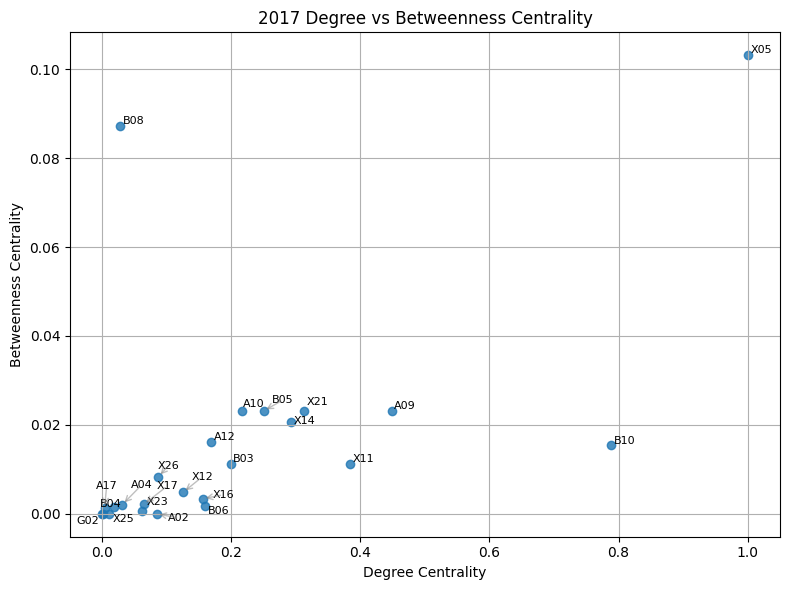

In [14]:
from adjustText import adjust_text

year = 2017
degree_centrality = year_degree_centrality[year]
betweenness_centrality = year_betweenness_centrality[year]

# 각 중심성 값과 노드(ATC 코드) 추출
nodes = list(degree_centrality.keys())
x = [degree_centrality[node] for node in nodes]
y = [betweenness_centrality[node] for node in nodes]

# 그래프 생성
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.8)

# 텍스트 추가
texts = []
for i, node in enumerate(nodes):
    if len(node) == 7:  # 7자리 ATC 코드인 경우에만 레이블 추가
        texts.append(plt.text(x[i], y[i], node[-3:], 
                            fontsize=8))

# 텍스트 위치 자동 조정
adjust_text(texts,
           arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
           expand_points=(1.5, 1.5))

# 그래프 스타일 설정
plt.title('2017 Degree vs Betweenness Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.grid(True)

# 축 범위 설정은 데이터 범위에 맞게 자동 조정되도록 제거
# plt.xlim과 plt.ylim 제거

plt.tight_layout()
plt.show()

In [19]:
# N06AB08, N06AB10 약물 이름 확인하기
drug_mapping = pd.read_csv('D:/소셜네트워크과학/Drug_Coprescription_Network_Analysis/data/antidepressant_mapping_v2.csv')
print('예외 노드 :', drug_mapping[drug_mapping['ATC_code']=='N06AB08']['ATC_name'].unique())
print('예외 노드 :', drug_mapping[drug_mapping['ATC_code']=='N06AB10']['ATC_name'].unique())

예외 노드 : ['fluvoxamine']
예외 노드 : ['escitalopram']


### 17~21년도 degree VS betweenness

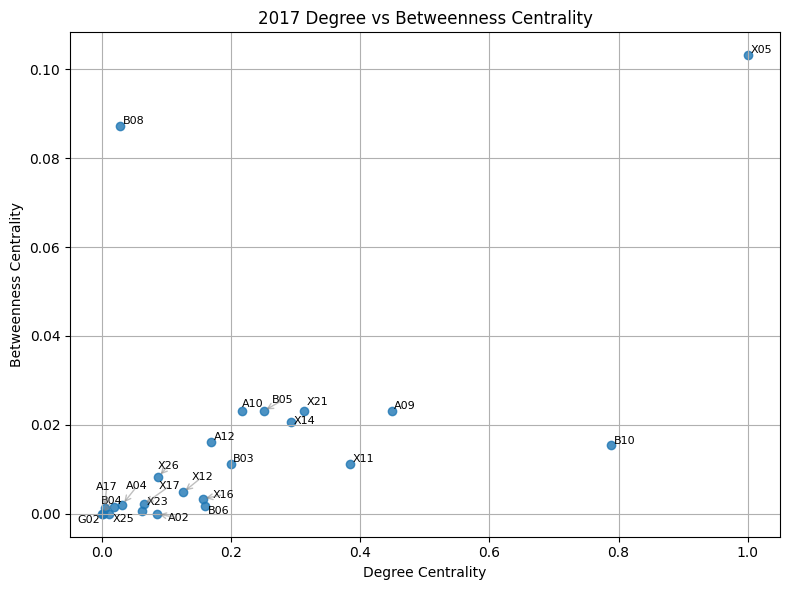

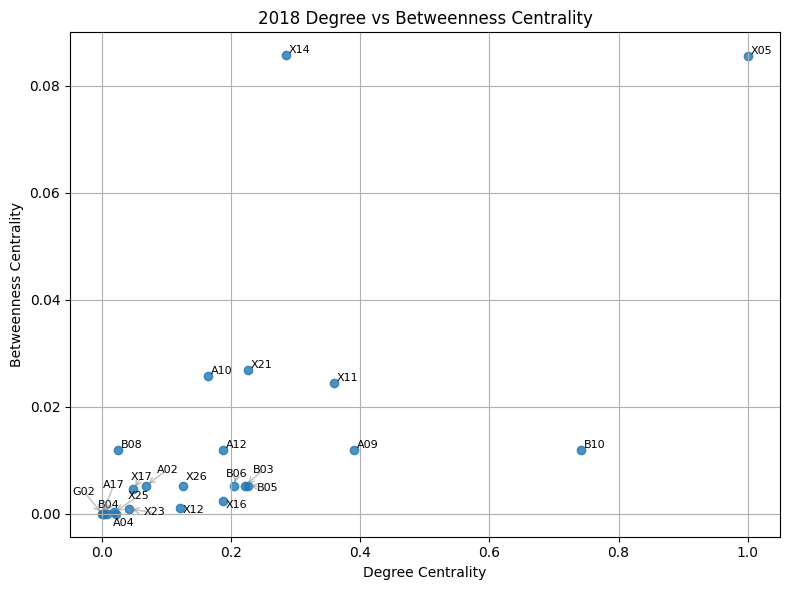

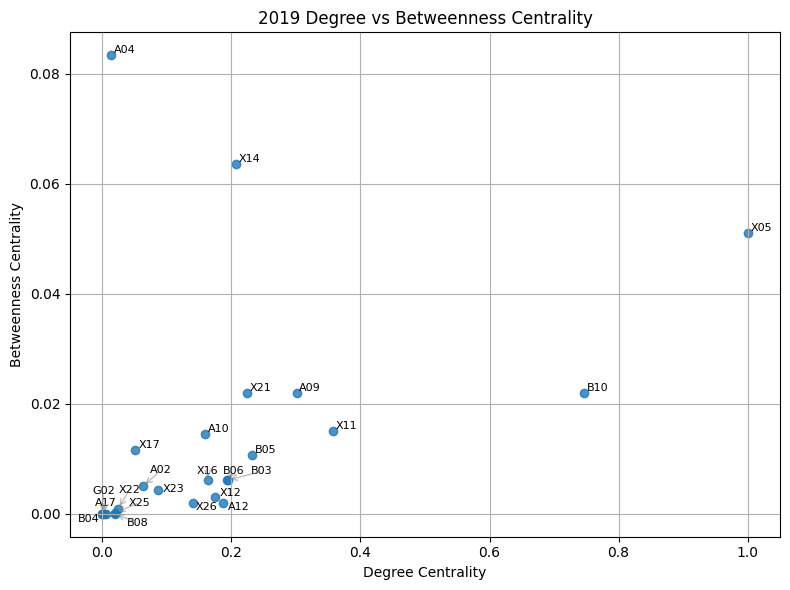

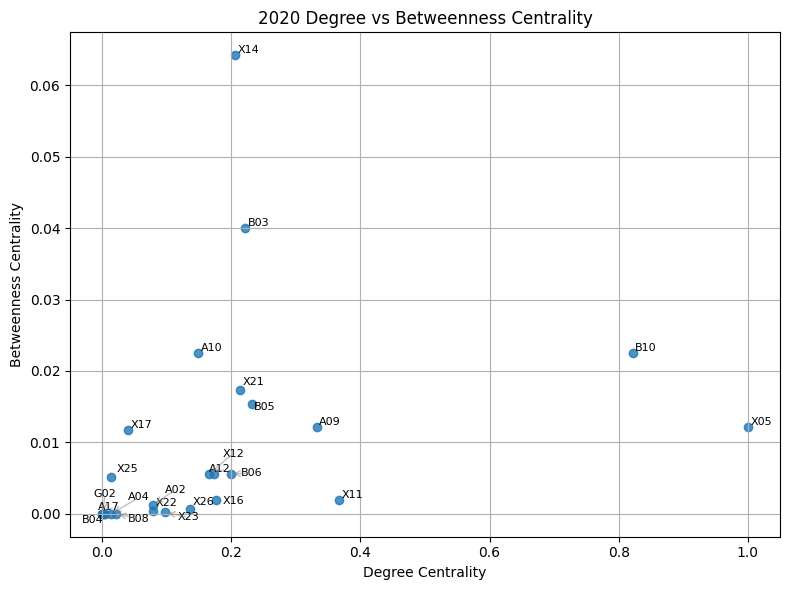

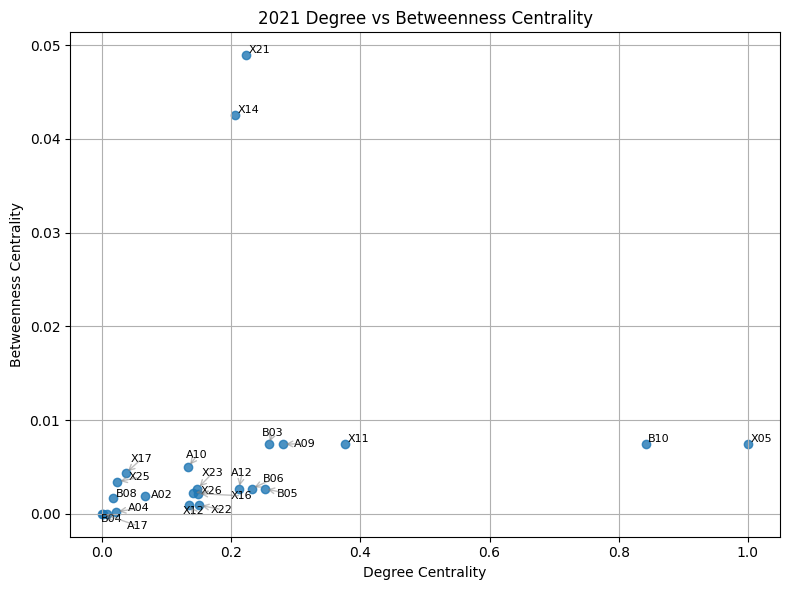

In [20]:
# 연도별 산점도 그리기
for year in sorted(year_degree_centrality.keys()):
    degree_centrality = year_degree_centrality[year]
    betweenness_centrality = year_betweenness_centrality[year]
    
    # 각 중심성 값과 노드 추출
    nodes = list(degree_centrality.keys())
    x = [degree_centrality[node] for node in nodes]
    y = [betweenness_centrality[node] for node in nodes]
    
    # 그래프 생성
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.8)
    
    # 텍스트 추가
    texts = []
    for i, node in enumerate(nodes):
        if len(node) == 7:  # 7자리 ATC 코드인 경우에만 레이블 추가
            texts.append(plt.text(x[i], y[i], node[-3:], 
                                fontsize=8))
    
    # 텍스트 위치 자동 조정
    adjust_text(texts,
               arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
               expand_points=(1.5, 1.5))
    
    # 그래프 스타일 설정
    plt.title(f'{year} Degree vs Betweenness Centrality')
    plt.xlabel('Degree Centrality')
    plt.ylabel('Betweenness Centrality')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [22]:
#N06AX14 성분 이름 확인하기
drug_mapping = pd.read_csv('D:/소셜네트워크과학/Drug_Coprescription_Network_Analysis/data/antidepressant_mapping_v2.csv')
print('예외 노드 :', drug_mapping[drug_mapping['ATC_code']=='N06AX14']['ATC_name'].values)

예외 노드 : ['tianeptine']


### degree VS eigenvector(2017)

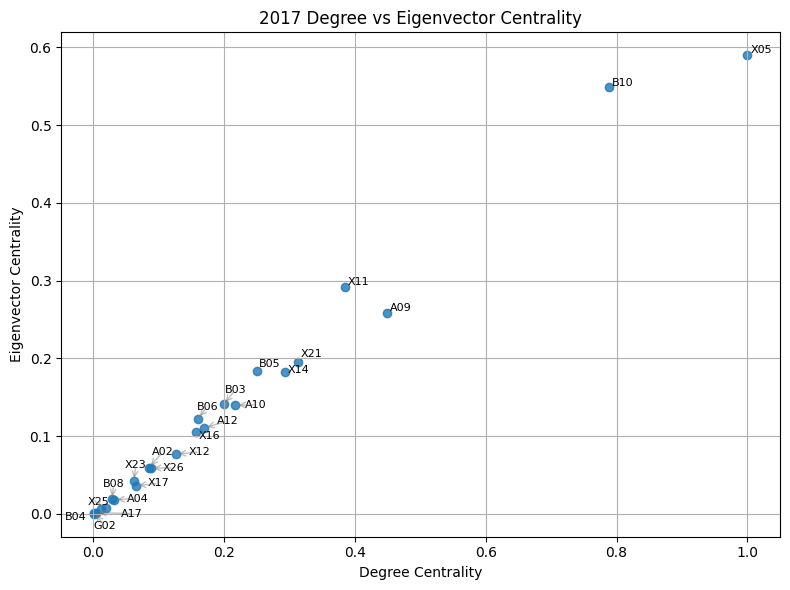

In [24]:
year = 2017
degree_centrality = year_degree_centrality[year]
eigenvector_centrality = year_eigenvector_centrality[year]

# 각 중심성 값과 노드(ATC 코드) 추출
nodes = list(degree_centrality.keys())
x = [degree_centrality[node] for node in nodes]
y = [eigenvector_centrality[node] for node in nodes]

# 그래프 생성
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.8)

# 텍스트 추가
texts = []
for i, node in enumerate(nodes):
    if len(node) == 7:  # 7자리 ATC 코드인 경우에만 레이블 추가
        texts.append(plt.text(x[i], y[i], node[-3:], 
                            fontsize=8))

# 텍스트 위치 자동 조정
adjust_text(texts,
           arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
           expand_points=(1.5, 1.5))

# 그래프 스타일 설정
plt.title('2017 Degree vs Eigenvector Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.grid(True)

# 축 범위 설정은 데이터 범위에 맞게 자동 조정되도록 제거
# plt.xlim과 plt.ylim 제거

plt.tight_layout()
plt.show()

### 추가된 노드, 없어진 노드 확인하기

In [25]:
# 연도별 노드 집합을 저장할 딕셔너리
year_nodes = {}

for year, df_year in data.groupby(data['요양개시일자'].dt.year):
    # 고유한 ATC 코드 페어 찾기 (self-loop 제외)
    grouped = df_year.groupby('처방내역일련번호')
    edges = set()
    nodes = set()  # 노드 집합 추가
    
    for _, group in grouped:
        atc_codes = list(group['ATC코드'].unique())
        nodes.update(atc_codes)  # 노드 추가
        # i+1부터 시작하여 self-loop 방지
        for i in range(len(atc_codes)):
            for j in range(i + 1, len(atc_codes)):
                edges.add((atc_codes[i], atc_codes[j]))
    
    # 그래프 생성 및 통계 계산 
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for edge in edges:
        G.add_edge(*edge)

    year_nodes[year] = nodes
    year_node_count[year] = G.number_of_nodes()
    if G.number_of_nodes() > 1:
        year_edge_count[year] = G.number_of_edges()
        year_density_no_self_loop[year] = nx.density(G)
    else:
        year_edge_count[year] = 0
        year_density_no_self_loop[year] = 0.0

# 연도별로 달라진 노드 찾기 및 출력
years = sorted(year_nodes.keys())
for i in range(1, len(years)):
    prev_year = years[i-1]
    curr_year = years[i]
    
    added_nodes = year_nodes[curr_year] - year_nodes[prev_year]
    removed_nodes = year_nodes[prev_year] - year_nodes[curr_year]
    
    print(f"\n{prev_year}년에서 {curr_year}년으로 변경된 노드:")
    
    if added_nodes:
        print(f"  추가된 노드 (ATC 코드):")
        for node in added_nodes:
            print(f"    - {node}")
    
    if removed_nodes:
        print(f"  제거된 노드 (ATC 코드):")
        for node in removed_nodes:
            print(f"    - {node}")
    
    if not added_nodes and not removed_nodes:
        print("  변경된 노드가 없습니다.")


2017년에서 2018년으로 변경된 노드:
  변경된 노드가 없습니다.

2018년에서 2019년으로 변경된 노드:
  추가된 노드 (ATC 코드):
    - N06AX22

2019년에서 2020년으로 변경된 노드:
  변경된 노드가 없습니다.

2020년에서 2021년으로 변경된 노드:
  제거된 노드 (ATC 코드):
    - N06AG02


In [26]:
drug_mapping = pd.read_csv('D:/소셜네트워크과학/Drug_Coprescription_Network_Analysis/data/antidepressant_mapping_v2.csv')
print('2019년에 추가된 노드 :', drug_mapping[drug_mapping['ATC_code']=='N06AX22']['ATC_name'].values)
print('2021년에 제거된 노드 :' , drug_mapping[drug_mapping['ATC_code']=='N06AG02']['ATC_name'].values)

2019년에 추가된 노드 : ['agomelatine']
2021년에 제거된 노드 : ['moclobemide']


## Average Clustering Coefficient

In [27]:
for year in sorted(year_graphs.keys()):
    G = year_graphs[year]
    print(f"{year}년:")
    print(f"  노드 수: {G.number_of_nodes()}")
    print(f"  엣지 수: {G.number_of_edges()}")

2017년:
  노드 수: 24
  엣지 수: 189
2018년:
  노드 수: 24
  엣지 수: 192
2019년:
  노드 수: 25
  엣지 수: 213
2020년:
  노드 수: 25
  엣지 수: 208
2021년:
  노드 수: 24
  엣지 수: 212


In [28]:
# 연도별 평균 군집계수 계산(가중치 제외)
for year in sorted(year_graphs.keys()):
    G = year_graphs[year]  # 해당 연도의 그래프 가져오기
    clustering_coef = nx.average_clustering(G)
    print(f"{year}년 평균 군집계수: {clustering_coef:.4f}")

2017년 평균 군집계수: 0.8087
2018년 평균 군집계수: 0.9005
2019년 평균 군집계수: 0.8697
2020년 평균 군집계수: 0.8742
2021년 평균 군집계수: 0.8967


## Node Level Clustering Coefficient Distribution

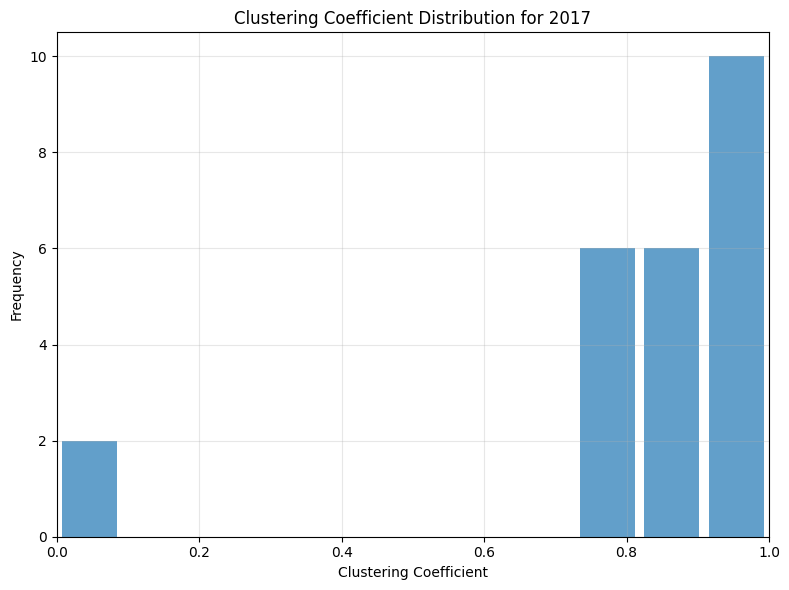

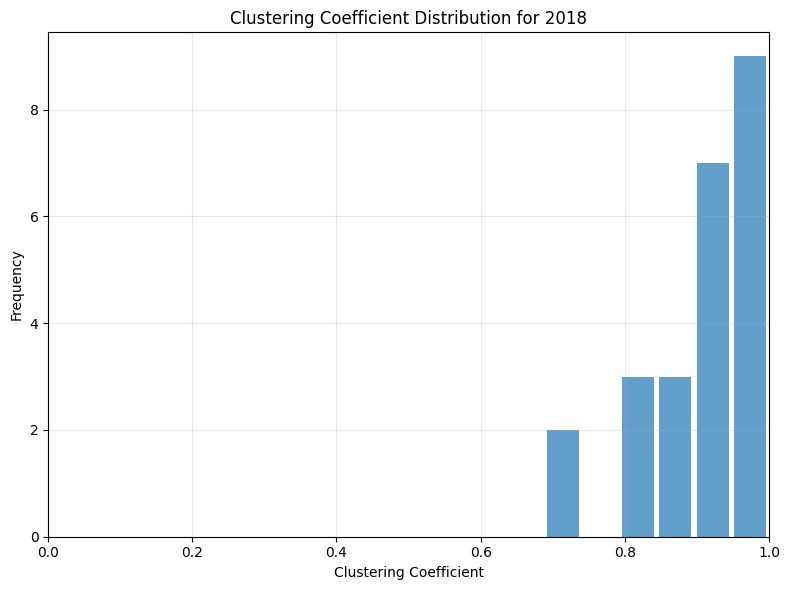

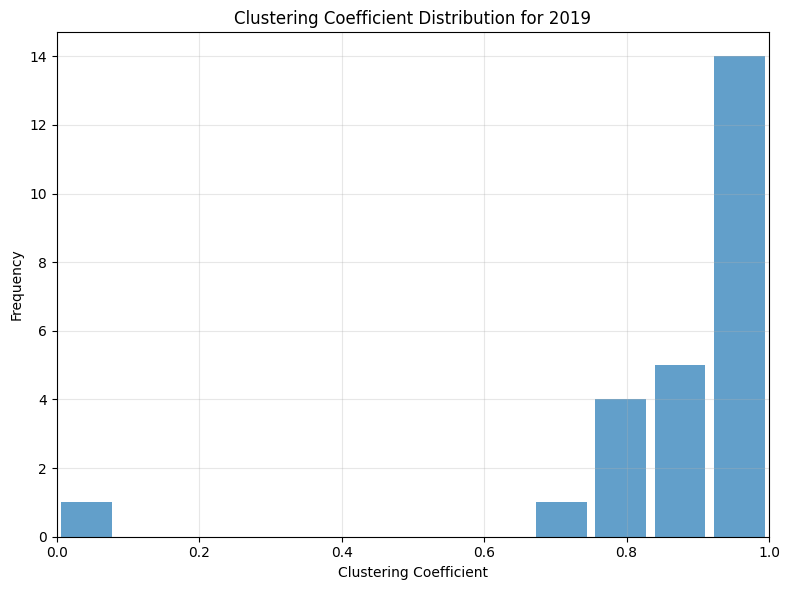

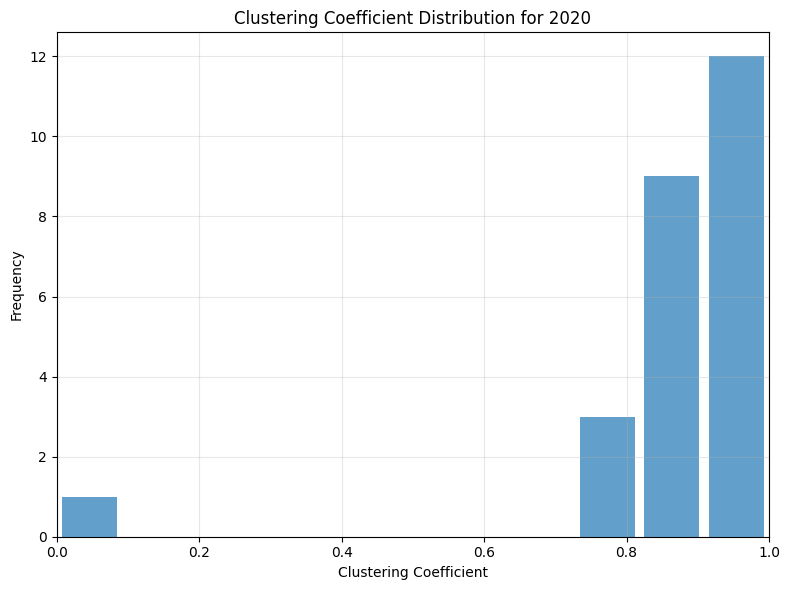

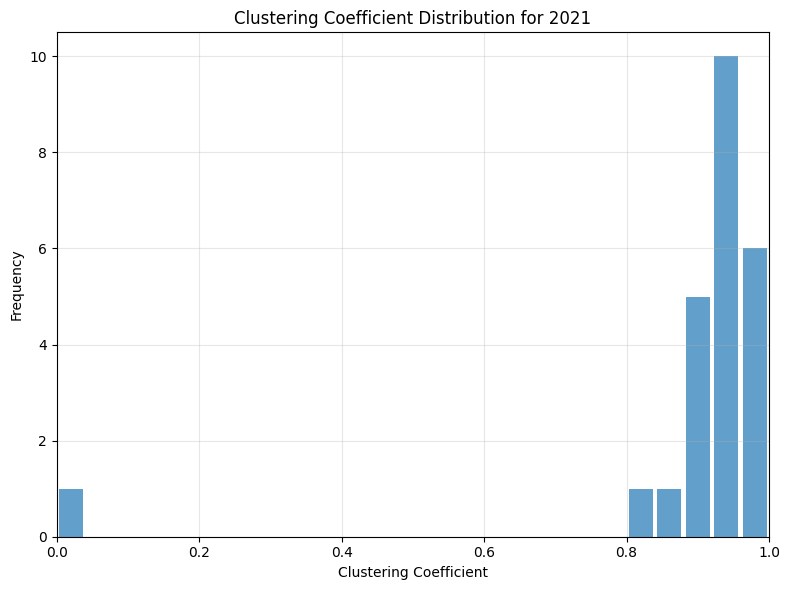

In [32]:
# 연도별로 군집계수 분포 시각화
for year in sorted(year_graphs.keys()):
    G = year_graphs[year]
    # 각 노드의 군집계수 계산
    clustering_coefficients = nx.clustering(G)
    
    # 히스토그램 생성
    plt.figure(figsize=(8, 6))
    plt.hist(list(clustering_coefficients.values()), 
            bins='auto',
            alpha=0.7,
            rwidth=0.85)
    
    # 그래프 스타일 설정
    plt.title(f'Clustering Coefficient Distribution for {year}')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # x축 범위 통일
    plt.xlim(0, 1.0)  # 모든 연도의 데이터를 포함할 수 있는 범위로 설정
    
    plt.tight_layout()
    plt.show()

### 2019년에 생성된 N06AX22(agomelatine) degree centrality 변화 살펴보기

2017년 N06AX22(agomelatine)의 Degree Centrality: 0.0000
2018년 N06AX22(agomelatine)의 Degree Centrality: 0.0000
2019년 N06AX22(agomelatine)의 Degree Centrality: 0.0245
2020년 N06AX22(agomelatine)의 Degree Centrality: 0.0783
2021년 N06AX22(agomelatine)의 Degree Centrality: 0.1498


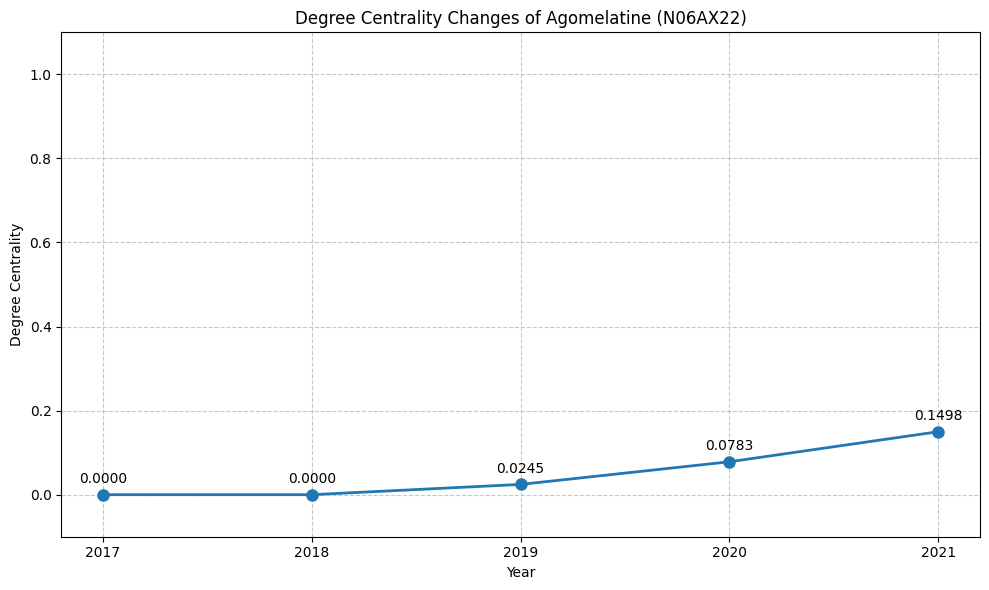

In [34]:
# N06AX22의 연도별 degree centrality 추출
target_node = 'N06AX22'
centrality_values = []
years = sorted(year_degree_centrality.keys())

for year in years:
    centrality = year_degree_centrality[year].get(target_node, 0.0)
    centrality_values.append(centrality)
    print(f"{year}년 {target_node}(agomelatine)의 Degree Centrality: {centrality:.4f}")

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(years, centrality_values, 'o-', linewidth=2, markersize=8)

# 그래프 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Degree Centrality Changes of Agomelatine (N06AX22)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Degree Centrality', fontsize=10)

# y축 범위 설정
plt.ylim(-0.1, 1.1)

# x축 눈금을 정수로 설정
plt.xticks(years, [int(year) for year in years])

# 데이터 포인트에 값 표시
for x, y in zip(years, centrality_values):
    plt.text(x, y + 0.02, f'{y:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2021년에 소멸된 N06AG02(moclobemide) degree 변화 살펴보기

2017년 N06AG02(moclobemide)의 Degree Centrality: 0.0009
2018년 N06AG02(moclobemide)의 Degree Centrality: 0.0009
2019년 N06AG02(moclobemide)의 Degree Centrality: 0.0003
2020년 N06AG02(moclobemide)의 Degree Centrality: 0.0002
2021년 N06AG02(moclobemide)의 Degree Centrality: 0.0000


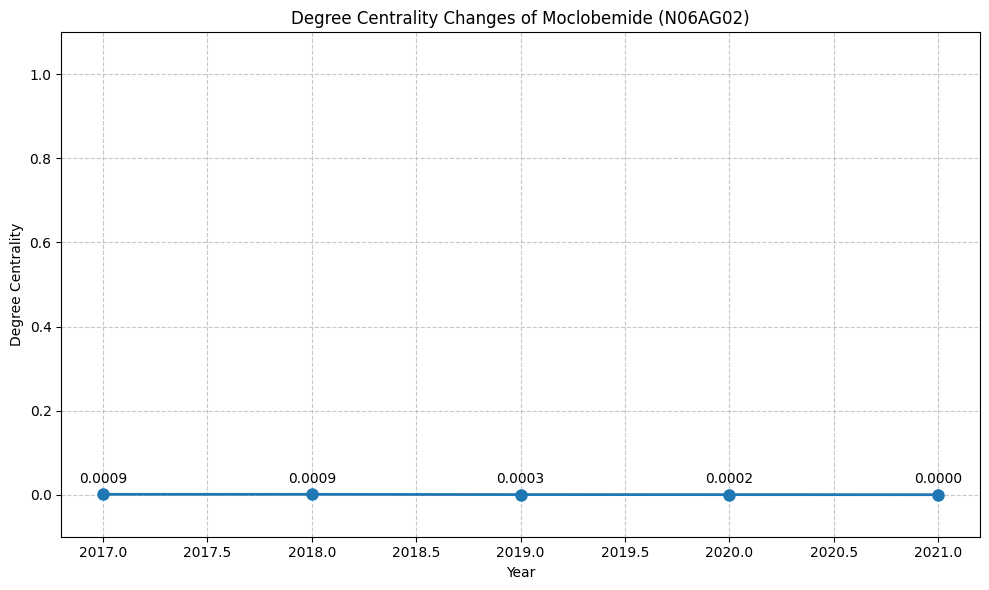

In [35]:
# N06AG02의 연도별 degree centrality 추출
target_node = 'N06AG02'
centrality_values = []
years = sorted(year_degree_centrality.keys())

for year in years:
    centrality = year_degree_centrality[year].get(target_node, 0.0)
    centrality_values.append(centrality)
    print(f"{year}년 {target_node}(moclobemide)의 Degree Centrality: {centrality:.4f}")

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(years, centrality_values, 'o-', linewidth=2, markersize=8)

# 그래프 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Degree Centrality Changes of Moclobemide (N06AG02)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Degree Centrality', fontsize=10)

# y축 범위 설정
plt.ylim(-0.1, 1.1)

# 데이터 포인트에 값 표시
for x, y in zip(years, centrality_values):
    plt.text(x, y + 0.02, f'{y:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()